In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import imblearn
%matplotlib inline

In [2]:
df=pd.read_csv('merged_data.csv', low_memory=False)
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date,LTP,Close - LTP,Close - LTP %
0,ACLBSL,50.94,"1,205.00","1,227.00","1,205.00","1,227.00","1,210.63",696,"1,227.00","842,596.00",...,1.83,1.33,"1,482.09","1,525.55","1,938.00",752,1/1/2022,NaN,NaN,NaN
1,ADBL,43.47,499,499,488,492,491.32,"200,533.00",494,"98,526,860.80",...,2.25,0.14,516.99,492.36,620,398,1/1/2022,NaN,NaN,NaN
2,AHPC,38,430,435,423,429.8,428.42,"74,145.00",427,"31,765,538.40",...,2.84,0.32,513.87,464.58,785,203,1/1/2022,NaN,NaN,NaN
3,AIL,53.35,661,705,661,678,681.12,"4,726.00",674,"3,218,967.00",...,6.66,-0.46,759.84,798.52,"1,125.00",588.8,1/1/2022,NaN,NaN,NaN
4,AKJCL,39.6,270,280,270,273,273.84,"44,404.00",274.9,"12,159,732.60",...,3.70,-0.31,334.76,293.73,502,116,1/1/2022,NaN,NaN,NaN


In [3]:
df.columns

Index(['Symbol', 'Conf.', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Vol',
       'Prev. Close', 'Turnover', 'Trans.', 'Diff', 'Range', 'Diff %',
       'Range %', 'VWAP %', '120 Days', '180 Days', '52 Weeks High',
       '52 Weeks Low', 'Date', 'LTP', 'Close - LTP', 'Close - LTP %'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361717 entries, 0 to 361716
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Symbol         361717 non-null  object 
 1   Conf.          361717 non-null  object 
 2   Open           361717 non-null  object 
 3   High           361717 non-null  object 
 4   Low            361717 non-null  object 
 5   Close          361717 non-null  object 
 6   VWAP           361717 non-null  object 
 7   Vol            361717 non-null  object 
 8   Prev. Close    361717 non-null  object 
 9   Turnover       361717 non-null  object 
 10  Trans.         361717 non-null  object 
 11  Diff           361717 non-null  object 
 12  Range          361717 non-null  object 
 13  Diff %         361717 non-null  float64
 14  Range %        361717 non-null  float64
 15  VWAP %         361717 non-null  float64
 16  120 Days       361717 non-null  object 
 17  180 Days       361717 non-nul

In [5]:
# Check for missing values
df.isnull().sum()

Symbol                0
Conf.                 0
Open                  0
High                  0
Low                   0
Close                 0
VWAP                  0
Vol                   0
Prev. Close           0
Turnover              0
Trans.                0
Diff                  0
Range                 0
Diff %                0
Range %               0
VWAP %                0
120 Days              0
180 Days              0
52 Weeks High         0
52 Weeks Low          0
Date                  0
LTP              330766
Close - LTP      331083
Close - LTP %    331083
dtype: int64

In [6]:
df = df.drop(columns=['LTP', 'Close - LTP', 'Close - LTP %'])

In [7]:
df['Conf.'].unique()

array(['50.94', '43.47', '38', ..., '19.45', '15.9', '21.03'],
      dtype=object)

In [8]:
df['Conf.'].isnull().sum()

0

In [9]:
# Remove commas and convert numeric columns
def clean_numeric(col):
    return pd.to_numeric(col.replace(',', '', regex=True), errors='coerce')

numeric_columns = ['Conf.', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Vol',
                   'Prev. Close', 'Turnover', 'Trans.', 'Diff', 'Range',
                   '120 Days', '180 Days', '52 Weeks High', '52 Weeks Low']

for col in numeric_columns:
    df[col] = clean_numeric(df[col])

In [10]:
df.describe(include='all')

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date
count,361717,210445.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,3.617170e+05,361717.000000,3.617170e+05,...,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,351088.000000,347261.000000,361717.000000,361717.000000,361717
unique,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1309
top,MLBL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/10/2022
freq,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452
mean,NaN,41.586329,902.765892,917.694914,888.173159,901.913131,900.947994,3.905362e+04,901.910062,1.623743e+07,...,0.028340,29.521755,-0.019900,3.687320,0.094845,860.056188,832.634326,1248.118640,648.792386,NaN
std,NaN,9.955280,2556.035787,2585.255480,2523.299342,2551.312769,2550.133128,1.155443e+05,2549.377240,4.249578e+07,...,66.507264,88.435253,2.541136,2.877786,3.783542,2484.452921,2438.237512,3169.024462,1880.452623,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.890000,1.000000e+00,0.000000,4.460000e+00,...,-3737.000000,-20.000000,-24.850000,-7.330000,-548.000000,0.000000,0.000000,7.990000,0.000000,NaN
25%,NaN,34.140000,268.100000,274.000000,262.000000,268.000000,267.630000,2.600000e+03,268.000000,8.327171e+05,...,-6.900000,6.400000,-1.430000,2.000000,-0.550000,236.050000,213.340000,381.000000,193.000000,NaN
50%,NaN,41.090000,494.100000,505.000000,484.000000,493.200000,493.000000,1.130800e+04,493.000000,4.743257e+06,...,-0.120000,15.000000,-0.190000,3.230000,0.000000,451.955000,420.970000,694.500000,318.600000,NaN
75%,NaN,48.370000,868.000000,881.100000,853.000000,866.410000,864.970000,3.594700e+04,867.000000,1.486038e+07,...,4.080000,28.400000,1.050000,4.800000,0.630000,819.520000,794.190000,1140.000000,642.000000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361717 entries, 0 to 361716
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Symbol         361717 non-null  object 
 1   Conf.          210445 non-null  float64
 2   Open           361717 non-null  float64
 3   High           361717 non-null  float64
 4   Low            361717 non-null  float64
 5   Close          361717 non-null  float64
 6   VWAP           361717 non-null  float64
 7   Vol            361717 non-null  float64
 8   Prev. Close    361717 non-null  float64
 9   Turnover       361717 non-null  float64
 10  Trans.         361717 non-null  int64  
 11  Diff           361717 non-null  float64
 12  Range          361717 non-null  float64
 13  Diff %         361717 non-null  float64
 14  Range %        361717 non-null  float64
 15  VWAP %         361717 non-null  float64
 16  120 Days       351088 non-null  float64
 17  180 Days       347261 non-nul

In [12]:
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date
0,ACLBSL,50.94,1205.0,1227.0,1205.0,1227.0,1210.63,696.0,1227.0,842596.0,...,0.0,22.0,0.00,1.83,1.33,1482.09,1525.55,1938.0,752.0,1/1/2022
1,ADBL,43.47,499.0,499.0,488.0,492.0,491.32,200533.0,494.0,98526860.8,...,-2.0,11.0,-0.40,2.25,0.14,516.99,492.36,620.0,398.0,1/1/2022
2,AHPC,38.00,430.0,435.0,423.0,429.8,428.42,74145.0,427.0,31765538.4,...,2.8,12.0,0.66,2.84,0.32,513.87,464.58,785.0,203.0,1/1/2022
3,AIL,53.35,661.0,705.0,661.0,678.0,681.12,4726.0,674.0,3218967.0,...,4.0,44.0,0.59,6.66,-0.46,759.84,798.52,1125.0,588.8,1/1/2022
4,AKJCL,39.60,270.0,280.0,270.0,273.0,273.84,44404.0,274.9,12159732.6,...,-1.9,10.0,-0.69,3.70,-0.31,334.76,293.73,502.0,116.0,1/1/2022


Date Column: Convert & Inspect

To confirm the dataset spans the expected time period (e.g., multiple years, daily records). Helps with time-series grouping later.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].min(), df['Date'].max())
print(df['Date'].nunique(), 'unique dates')

2021-09-01 00:00:00 2025-07-01 00:00:00
1309 unique dates


Null Value Analysis

This tells where imputation, removal, or interpolation may be needed before modeling. You should mention which columns are incomplete and what your plan is (e.g., drop, fill, or ignore).

In [14]:
df.isnull().sum().sort_values(ascending=False)

Conf.            151272
180 Days          14456
120 Days          10629
Symbol                0
Diff                  0
52 Weeks Low          0
52 Weeks High         0
VWAP %                0
Range %               0
Diff %                0
Range                 0
Trans.                0
Turnover              0
Prev. Close           0
Vol                   0
VWAP                  0
Close                 0
Low                   0
High                  0
Open                  0
Date                  0
dtype: int64

In [15]:
df['Conf.'].unique()

array([50.94, 43.47, 38.  , ..., 19.45, 15.9 , 21.03])

In [16]:
# Fill Conf. with 0
df['Conf.'] = df['Conf.'].fillna(0)

Mean vs. Median:

Mean is okay when data is roughly normally distributed.

Median is safer when you expect outliers or skewed data.

But since you're dealing with rolling averages, mean is conceptually better (consistent with their definition).

In [17]:
# Sort and forward-fill per stock
df.sort_values(['Symbol', 'Date'], inplace=True)
df['120 Days'] = df.groupby('Symbol')['120 Days'].ffill()
df['180 Days'] = df.groupby('Symbol')['180 Days'].ffill()

# Fill remaining missing with mean
df['120 Days'] = df['120 Days'].fillna(df['120 Days'].mean())
df['180 Days'] = df['180 Days'].fillna(df['180 Days'].mean())

In [18]:
df.isnull().sum().sort_values(ascending=False)

Symbol           0
Diff             0
52 Weeks Low     0
52 Weeks High    0
180 Days         0
120 Days         0
VWAP %           0
Range %          0
Diff %           0
Range            0
Trans.           0
Conf.            0
Turnover         0
Prev. Close      0
Vol              0
VWAP             0
Close            0
Low              0
High             0
Open             0
Date             0
dtype: int64

Unique Values & Frequency Check

Helps identify which stocks dominate the dataset or if some dates are underrepresented.

In [19]:
df['Symbol'].nunique()

545

Most Frequent Stock

In [20]:
df['Symbol'].value_counts().head(10)

Symbol
MEN       1311
SANIMA    1311
EDBL      1311
SINDU     1311
SWBBL     1311
SBL       1311
LBBL      1311
SBI       1311
EBL       1311
LEC       1311
Name: count, dtype: int64

Axes(0.125,0.2;0.775x0.68)


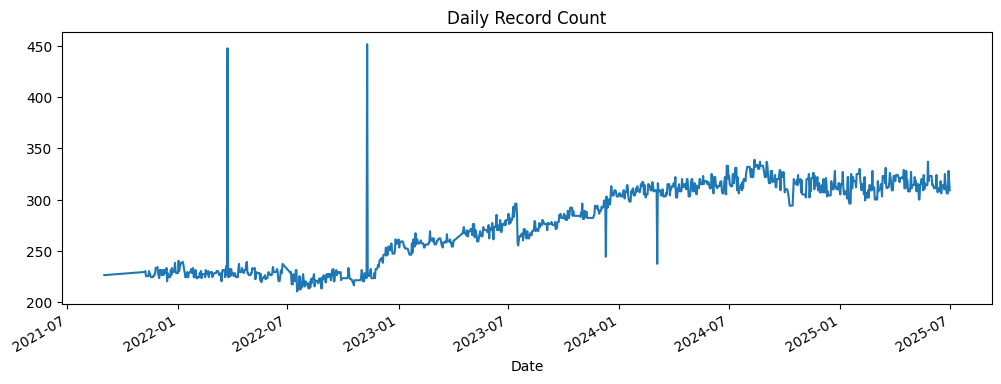

In [21]:
print(df['Date'].value_counts().sort_index().plot(figsize=(12,4), title="Daily Record Count"))

Outlier Detection

Outliers in Price, Volume, or Turnover could either be data errors or unusual trading events. This helps you decide what to keep/remove.

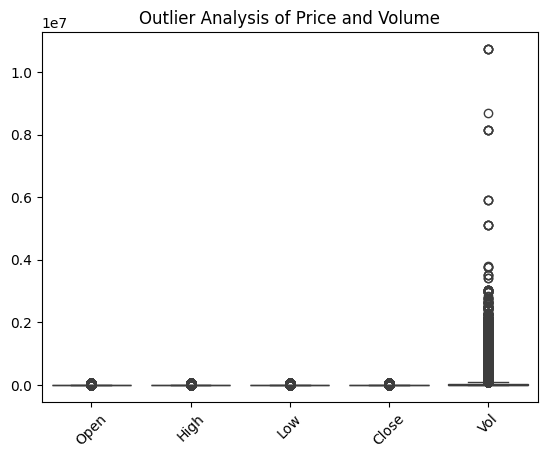

In [22]:
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Vol']])
plt.title('Outlier Analysis of Price and Volume')
plt.xticks(rotation=45)
plt.show()

Correlation Matrix

Shows relationships between features like Open, Close, Vol, etc. Helps with future feature selection and understanding which fields move together.

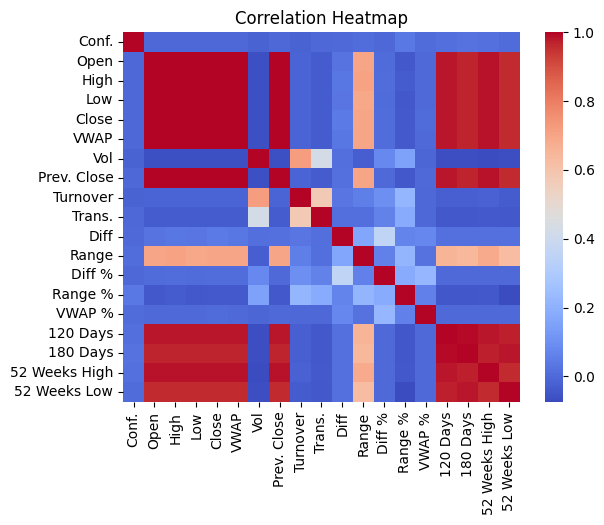

In [23]:
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361717 entries, 246552 to 140764
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Symbol         361717 non-null  object        
 1   Conf.          361717 non-null  float64       
 2   Open           361717 non-null  float64       
 3   High           361717 non-null  float64       
 4   Low            361717 non-null  float64       
 5   Close          361717 non-null  float64       
 6   VWAP           361717 non-null  float64       
 7   Vol            361717 non-null  float64       
 8   Prev. Close    361717 non-null  float64       
 9   Turnover       361717 non-null  float64       
 10  Trans.         361717 non-null  int64         
 11  Diff           361717 non-null  float64       
 12  Range          361717 non-null  float64       
 13  Diff %         361717 non-null  float64       
 14  Range %        361717 non-null  float64       
 15  

In [25]:
df.describe()

,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date
count,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,3.617170e+05,361717.000000,3.617170e+05,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717
mean,24.194702,902.765892,917.694914,888.173159,901.913131,900.947994,3.905362e+04,901.910062,1.623743e+07,224.170528,0.028340,29.521755,-0.019900,3.687320,0.094845,860.030816,832.458498,1248.118640,648.792386,2023-10-26 09:32:46.331690496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.890000,1.000000e+00,0.000000,4.460000e+00,0.000000,-3737.000000,-20.000000,-24.850000,-7.330000,-548.000000,0.000000,0.000000,7.990000,0.000000,2021-09-01 00:00:00
25%,0.000000,268.100000,274.000000,262.000000,268.000000,267.630000,2.600000e+03,268.000000,8.327171e+05,26.000000,-6.900000,6.400000,-1.430000,2.000000,-0.550000,240.520000,222.170000,381.000000,193.000000,2022-12-16 00:00:00
50%,30.560000,494.100000,505.000000,484.000000,493.200000,493.000000,1.130800e+04,493.000000,4.743257e+06,97.000000,-0.120000,15.000000,-0.190000,3.230000,0.000000,467.320000,444.550000,694.500000,318.600000,2023-12-01 00:00:00
75%,42.950000,868.000000,881.100000,853.000000,866.410000,864.970000,3.594700e+04,867.000000,1.486038e+07,244.000000,4.080000,28.400000,1.050000,4.800000,0.630000,860.030816,832.458498,1140.000000,642.000000,2024-09-15 00:00:00
max,76.000000,55080.000000,56805.800000,53400.000000,55000.000000,54715.850000,1.073700e+07,55000.000000,2.012993e+09,154011.000000,4113.900000,5587.000000,20.000000,380.000000,99.900000,48565.290000,47887.880000,56805.800000,43022.000000,2025-07-01 00:00:00
std,21.873421,2556.035787,2585.255480,2523.299342,2551.312769,2550.133128,1.155443e+05,2549.377240,4.249578e+07,685.595907,66.507264,88.435253,2.541136,2.877786,3.783542,2450.574044,2391.602898,3169.024462,1880.452623,NaN


In [26]:
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,Diff,Range,Diff %,Range %,VWAP %,120 Days,180 Days,52 Weeks High,52 Weeks Low,Date
246552,ACLBSL,43.16,1570.0,1615.0,1570.0,1581.0,1592.82,2650.0,1580.0,4220975.0,...,1.0,45.0,0.06,2.87,-0.75,1610.18,1478.90,1938.0,691.0,2021-09-01
298480,ACLBSL,57.96,1575.0,1630.0,1575.0,1575.1,1578.69,2440.0,1600.0,3852010.7,...,-24.9,55.0,-1.56,3.49,-0.23,1574.69,1585.05,1938.0,752.0,2021-11-03
300321,ACLBSL,56.39,1575.0,1630.0,1575.0,1575.1,1578.69,2440.0,1600.0,3852010.7,...,-24.9,55.0,-1.56,3.49,-0.23,1574.69,1585.05,1938.0,752.0,2021-11-05
301361,ACLBSL,56.39,1575.0,1630.0,1575.0,1575.1,1578.69,2440.0,1600.0,3852010.7,...,-24.9,55.0,-1.56,3.49,-0.23,1574.69,1585.05,1938.0,752.0,2021-11-06
302421,ACLBSL,56.39,1575.0,1630.0,1575.0,1575.1,1578.69,2440.0,1600.0,3852010.7,...,-24.9,55.0,-1.56,3.49,-0.23,1574.69,1585.05,1938.0,752.0,2021-11-07


In [27]:
num_cols = ['Open', 'High', 'Low', 'Close', 'Vol', 'Turnover']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

Outlier Treatment

Applied log transformation to skewed columns like Vol, Turnover for better normalization:

In [28]:
df['log_vol'] = np.log1p(df['Vol'])
df['log_turnover'] = np.log1p(df['Turnover'])

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Symbol_encoded'] = le.fit_transform(df['Symbol'])

In [30]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_cols = ['Open', 'High', 'Low', 'Close', 'Vol', 'Turnover', 'Diff', 'Range']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361717 entries, 246552 to 140764
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Symbol          361717 non-null  object        
 1   Conf.           361717 non-null  float64       
 2   Open            361717 non-null  float64       
 3   High            361717 non-null  float64       
 4   Low             361717 non-null  float64       
 5   Close           361717 non-null  float64       
 6   VWAP            361717 non-null  float64       
 7   Vol             361717 non-null  float64       
 8   Prev. Close     361717 non-null  float64       
 9   Turnover        361717 non-null  float64       
 10  Trans.          361717 non-null  int64         
 11  Diff            361717 non-null  float64       
 12  Range           361717 non-null  float64       
 13  Diff %          361717 non-null  float64       
 14  Range %         361717 non-null  flo

In [33]:
df.describe()

,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
count,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,...,361717.000000,361717.000000,361717,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000
mean,24.194702,0.681223,0.679781,0.683880,0.682998,900.947994,0.832027,901.910062,0.819393,224.170528,...,1248.118640,648.792386,2023-10-26 09:32:46.331690496,8.968480,14.877036,270.638029,2023.334557,6.321862,15.782040,2.997034
min,0.000000,-0.823637,-0.831823,-0.818951,-0.824184,0.890000,-0.339071,0.000000,-0.338136,0.000000,...,7.990000,0.000000,2021-09-01 00:00:00,0.693147,1.697449,0.000000,2021.000000,1.000000,1.000000,0.000000
25%,0.000000,-0.376729,-0.380497,-0.375635,-0.376331,267.630000,-0.261133,268.000000,-0.278773,26.000000,...,381.000000,193.000000,2022-12-16 00:00:00,7.863651,13.632450,131.000000,2022.000000,3.000000,8.000000,1.000000
50%,30.560000,0.000000,0.000000,0.000000,0.000000,493.000000,0.000000,493.000000,0.000000,97.000000,...,694.500000,318.600000,2023-12-01 00:00:00,9.333354,15.372235,268.000000,2023.000000,6.000000,16.000000,3.000000
75%,42.950000,0.623271,0.619503,0.624365,0.623669,864.970000,0.738867,867.000000,0.721227,244.000000,...,1140.000000,642.000000,2024-09-15 00:00:00,10.489829,16.514209,411.000000,2024.000000,9.000000,23.000000,5.000000
max,76.000000,90.991665,92.737276,89.536379,91.086045,54715.850000,321.638888,55000.000000,143.163519,154011.000000,...,56805.800000,43022.000000,2025-07-01 00:00:00,16.189206,21.422889,544.000000,2025.000000,12.000000,31.000000,6.000000
std,21.873421,4.260770,4.258368,4.269542,4.263486,2550.133128,3.464908,2549.377240,3.029426,685.595907,...,3169.024462,1880.452623,NaN,2.203763,2.353939,160.868039,1.098803,3.537074,8.792492,1.999899


In [34]:
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
246552,ACLBSL,43.16,1.793466,1.828364,1.837563,1.817817,1592.82,-0.259634,1580.0,-0.037232,...,1938.0,691.0,2021-09-01,7.882692,15.255577,0,2021,9,1,2
298480,ACLBSL,57.96,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-03,7.800163,15.164106,0,2021,11,3,2
300321,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-05,7.800163,15.164106,0,2021,11,5,4
301361,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-06,7.800163,15.164106,0,2021,11,6,5
302421,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-07,7.800163,15.164106,0,2021,11,7,6


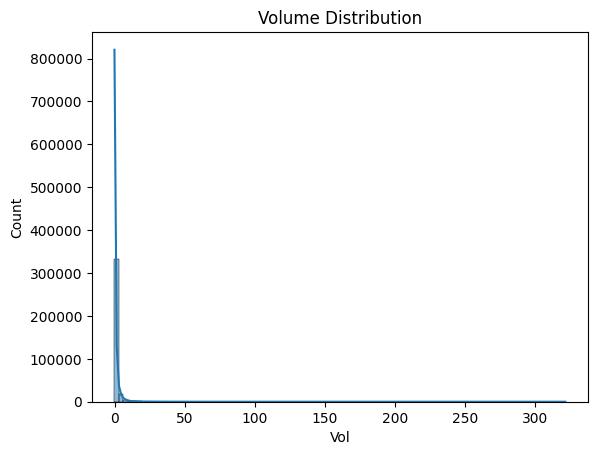

In [35]:
sns.histplot(df['Vol'], bins=100, kde=True)
plt.title("Volume Distribution")
plt.show()

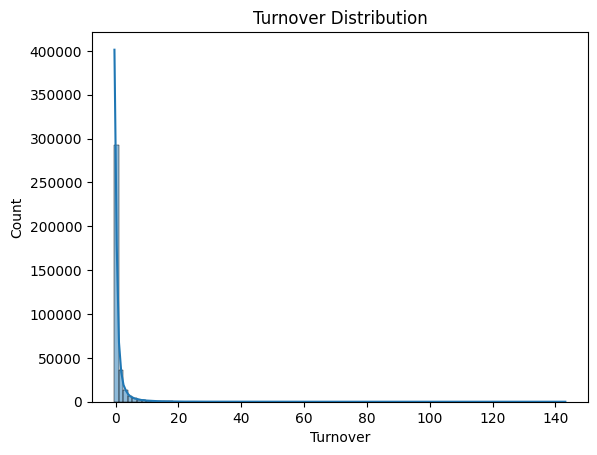

In [36]:
sns.histplot(df['Turnover'], bins=100, kde=True)
plt.title("Turnover Distribution")
plt.show()

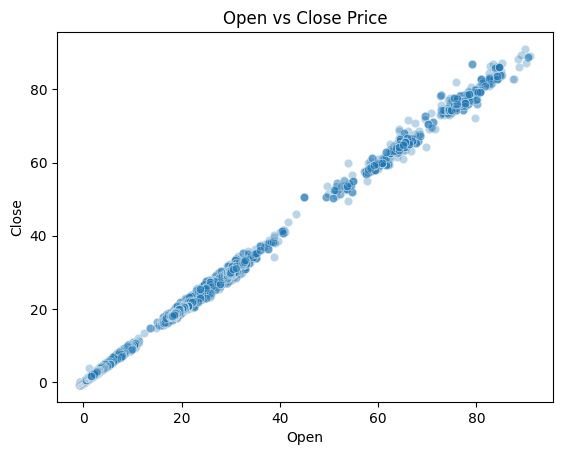

In [37]:
sns.scatterplot(x=df['Open'], y=df['Close'], alpha=0.3)
plt.title("Open vs Close Price")
plt.show()

<Axes: title={'center': 'Daily Record Count'}, xlabel='Date'>

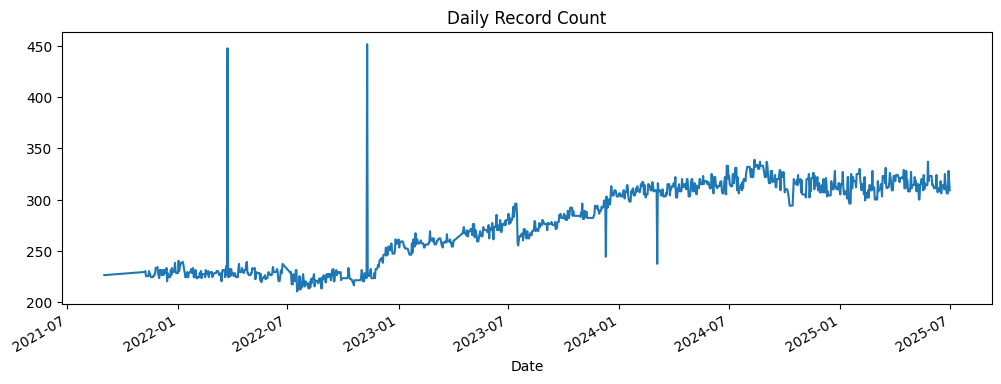

In [38]:
df['Date'].value_counts().sort_index().plot(figsize=(12,4), title="Daily Record Count")

<Axes: title={'center': 'Daily Total Volume Over Time'}, xlabel='Date'>

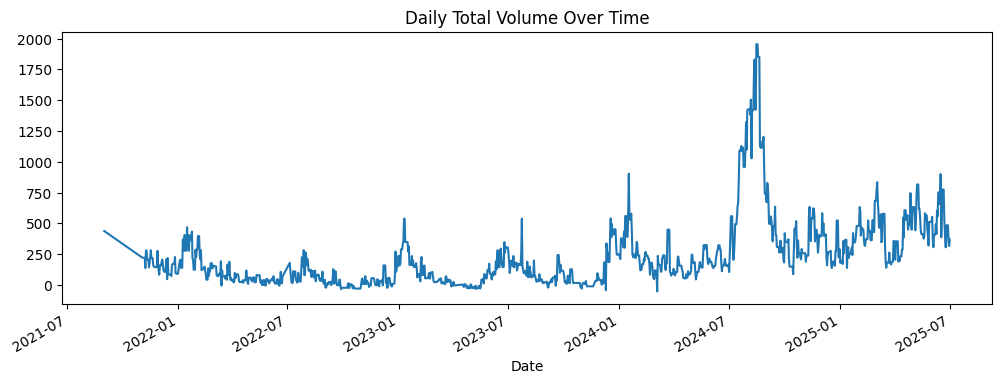

In [39]:
df.groupby('Date')['Vol'].sum().plot(figsize=(12,4), title="Daily Total Volume Over Time")

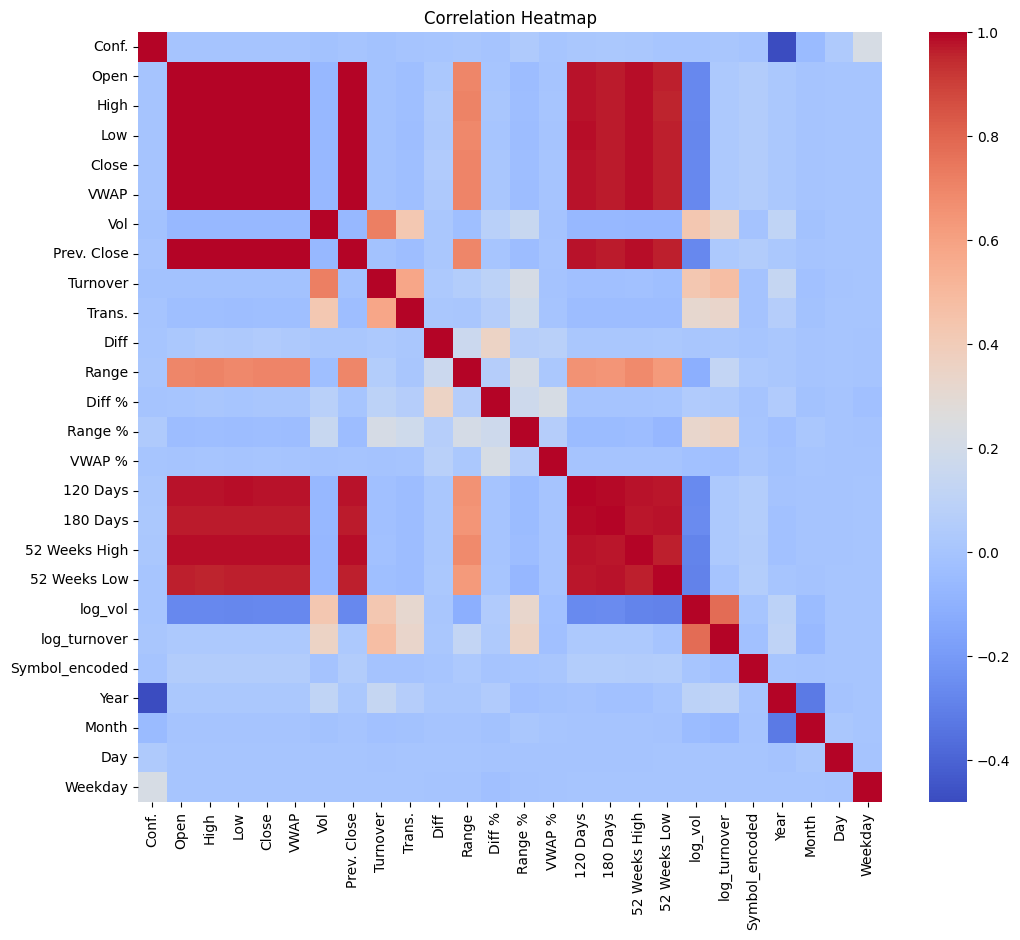

In [40]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Top 10 Traded Symbols'}, xlabel='Symbol'>

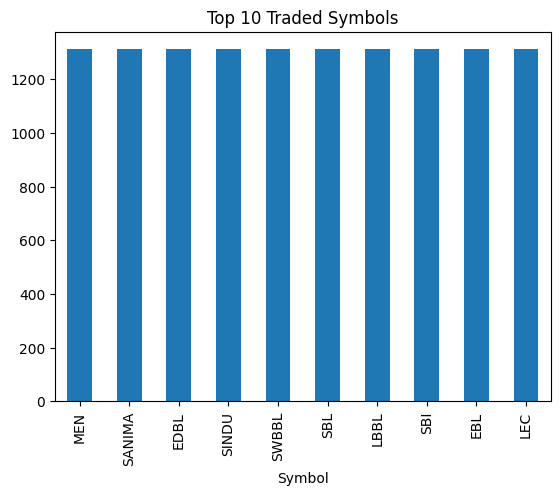

In [41]:
df['Symbol'].value_counts().head(10).plot(kind='bar', title="Top 10 Traded Symbols")

Text(0.5, 1.0, 'Volume by Weekday')

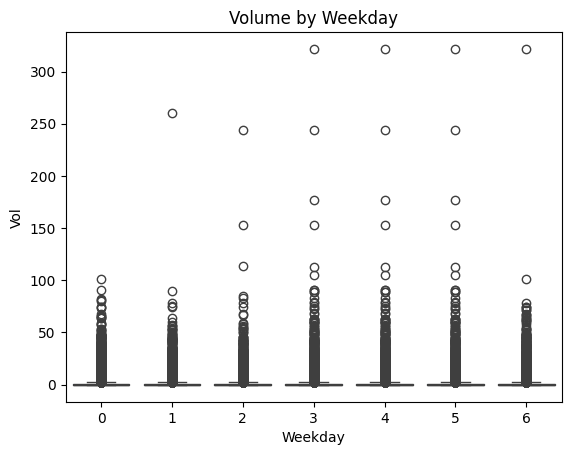

In [42]:
sns.boxplot(x='Weekday', y='Vol', data=df)
plt.title("Volume by Weekday")

Text(0.5, 1.02, 'Pairplot of Key Trading Variables')

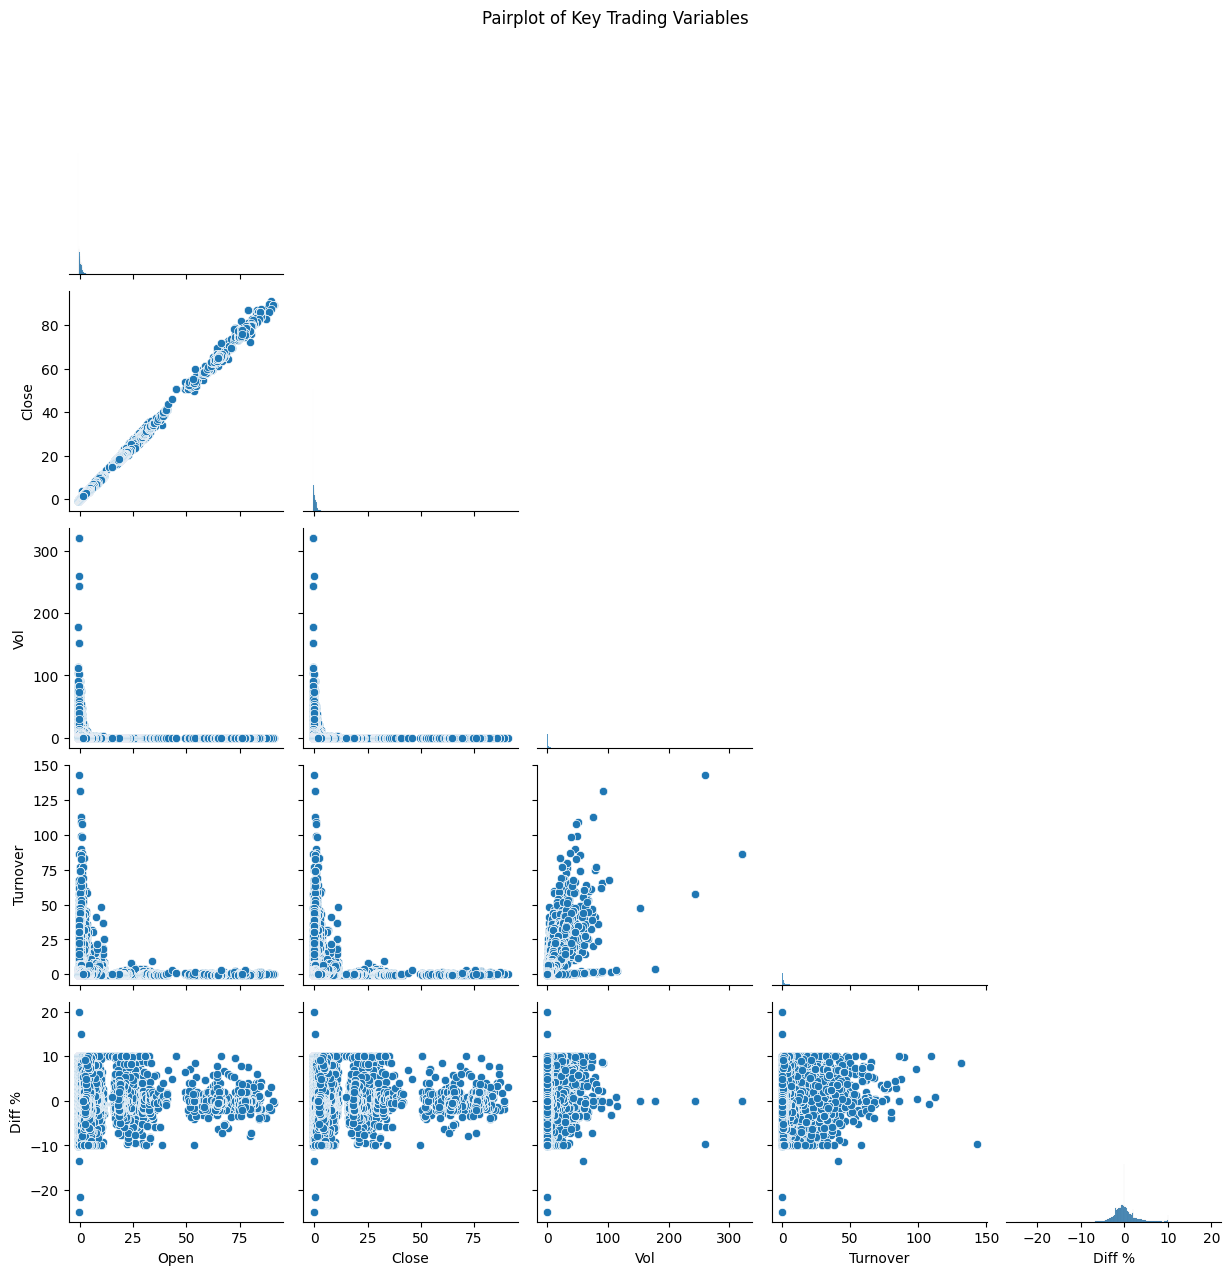

In [43]:
import seaborn as sns
sns.pairplot(df[['Open', 'Close', 'Vol', 'Turnover', 'Diff %']], corner=True)
plt.suptitle("Pairplot of Key Trading Variables", y=1.02)

In [44]:
df.describe()

,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
count,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,...,361717.000000,361717.000000,361717,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000
mean,24.194702,0.681223,0.679781,0.683880,0.682998,900.947994,0.832027,901.910062,0.819393,224.170528,...,1248.118640,648.792386,2023-10-26 09:32:46.331690496,8.968480,14.877036,270.638029,2023.334557,6.321862,15.782040,2.997034
min,0.000000,-0.823637,-0.831823,-0.818951,-0.824184,0.890000,-0.339071,0.000000,-0.338136,0.000000,...,7.990000,0.000000,2021-09-01 00:00:00,0.693147,1.697449,0.000000,2021.000000,1.000000,1.000000,0.000000
25%,0.000000,-0.376729,-0.380497,-0.375635,-0.376331,267.630000,-0.261133,268.000000,-0.278773,26.000000,...,381.000000,193.000000,2022-12-16 00:00:00,7.863651,13.632450,131.000000,2022.000000,3.000000,8.000000,1.000000
50%,30.560000,0.000000,0.000000,0.000000,0.000000,493.000000,0.000000,493.000000,0.000000,97.000000,...,694.500000,318.600000,2023-12-01 00:00:00,9.333354,15.372235,268.000000,2023.000000,6.000000,16.000000,3.000000
75%,42.950000,0.623271,0.619503,0.624365,0.623669,864.970000,0.738867,867.000000,0.721227,244.000000,...,1140.000000,642.000000,2024-09-15 00:00:00,10.489829,16.514209,411.000000,2024.000000,9.000000,23.000000,5.000000
max,76.000000,90.991665,92.737276,89.536379,91.086045,54715.850000,321.638888,55000.000000,143.163519,154011.000000,...,56805.800000,43022.000000,2025-07-01 00:00:00,16.189206,21.422889,544.000000,2025.000000,12.000000,31.000000,6.000000
std,21.873421,4.260770,4.258368,4.269542,4.263486,2550.133128,3.464908,2549.377240,3.029426,685.595907,...,3169.024462,1880.452623,NaN,2.203763,2.353939,160.868039,1.098803,3.537074,8.792492,1.999899


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361717 entries, 246552 to 140764
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Symbol          361717 non-null  object        
 1   Conf.           361717 non-null  float64       
 2   Open            361717 non-null  float64       
 3   High            361717 non-null  float64       
 4   Low             361717 non-null  float64       
 5   Close           361717 non-null  float64       
 6   VWAP            361717 non-null  float64       
 7   Vol             361717 non-null  float64       
 8   Prev. Close     361717 non-null  float64       
 9   Turnover        361717 non-null  float64       
 10  Trans.          361717 non-null  int64         
 11  Diff            361717 non-null  float64       
 12  Range           361717 non-null  float64       
 13  Diff %          361717 non-null  float64       
 14  Range %         361717 non-null  flo

In [46]:
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
246552,ACLBSL,43.16,1.793466,1.828364,1.837563,1.817817,1592.82,-0.259634,1580.0,-0.037232,...,1938.0,691.0,2021-09-01,7.882692,15.255577,0,2021,9,1,2
298480,ACLBSL,57.96,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-03,7.800163,15.164106,0,2021,11,3,2
300321,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-05,7.800163,15.164106,0,2021,11,5,4
301361,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-06,7.800163,15.164106,0,2021,11,6,5
302421,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-07,7.800163,15.164106,0,2021,11,7,6


In [47]:
df['Year'].nunique()

5

In [48]:
df['Year'].unique()

array([2021, 2022, 2023, 2024, 2025])

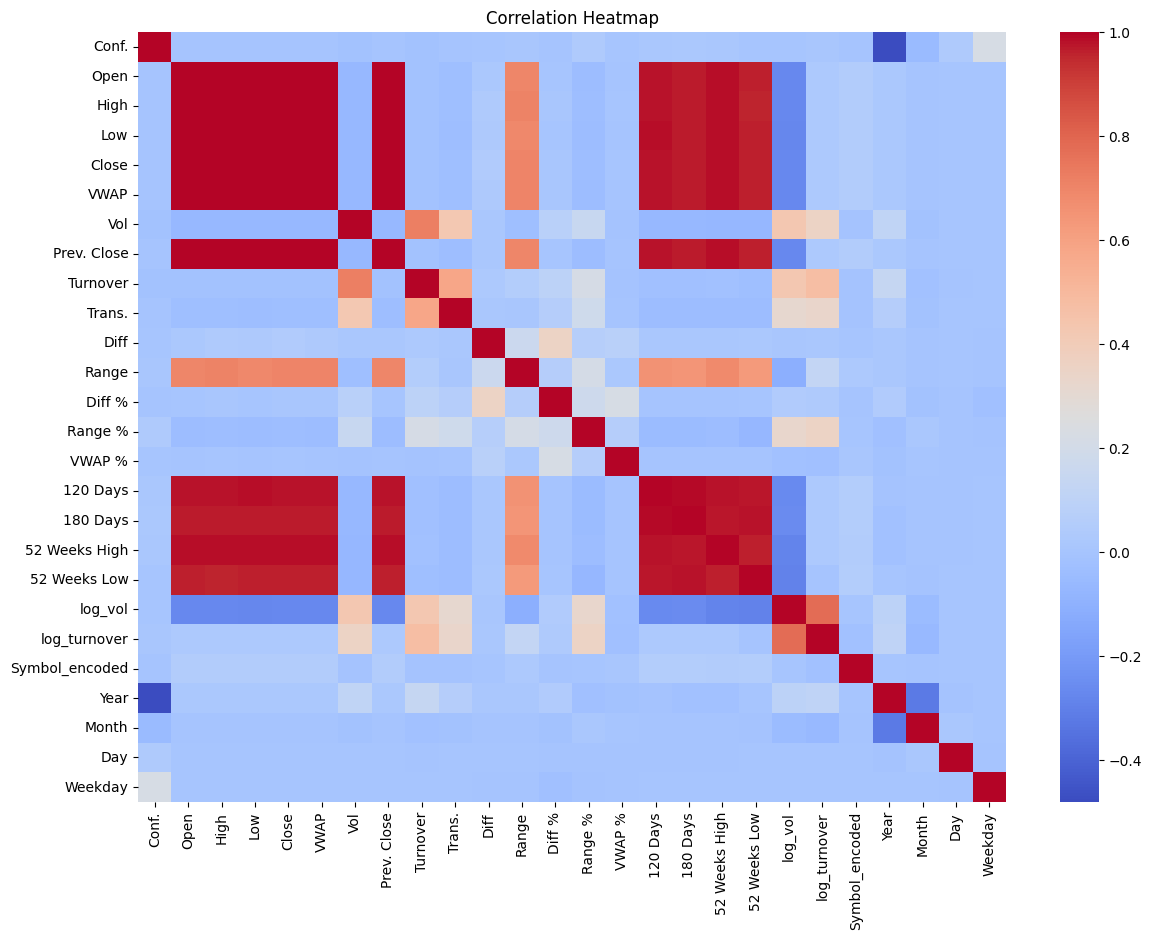

In [49]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [50]:
df.head()

,Symbol,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
246552,ACLBSL,43.16,1.793466,1.828364,1.837563,1.817817,1592.82,-0.259634,1580.0,-0.037232,...,1938.0,691.0,2021-09-01,7.882692,15.255577,0,2021,9,1,2
298480,ACLBSL,57.96,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-03,7.800163,15.164106,0,2021,11,3,2
300321,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-05,7.800163,15.164106,0,2021,11,5,4
301361,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-06,7.800163,15.164106,0,2021,11,6,5
302421,ACLBSL,56.39,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,...,1938.0,752.0,2021-11-07,7.800163,15.164106,0,2021,11,7,6


In [51]:
df.describe()

,Conf.,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
count,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,...,361717.000000,361717.000000,361717,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000
mean,24.194702,0.681223,0.679781,0.683880,0.682998,900.947994,0.832027,901.910062,0.819393,224.170528,...,1248.118640,648.792386,2023-10-26 09:32:46.331690496,8.968480,14.877036,270.638029,2023.334557,6.321862,15.782040,2.997034
min,0.000000,-0.823637,-0.831823,-0.818951,-0.824184,0.890000,-0.339071,0.000000,-0.338136,0.000000,...,7.990000,0.000000,2021-09-01 00:00:00,0.693147,1.697449,0.000000,2021.000000,1.000000,1.000000,0.000000
25%,0.000000,-0.376729,-0.380497,-0.375635,-0.376331,267.630000,-0.261133,268.000000,-0.278773,26.000000,...,381.000000,193.000000,2022-12-16 00:00:00,7.863651,13.632450,131.000000,2022.000000,3.000000,8.000000,1.000000
50%,30.560000,0.000000,0.000000,0.000000,0.000000,493.000000,0.000000,493.000000,0.000000,97.000000,...,694.500000,318.600000,2023-12-01 00:00:00,9.333354,15.372235,268.000000,2023.000000,6.000000,16.000000,3.000000
75%,42.950000,0.623271,0.619503,0.624365,0.623669,864.970000,0.738867,867.000000,0.721227,244.000000,...,1140.000000,642.000000,2024-09-15 00:00:00,10.489829,16.514209,411.000000,2024.000000,9.000000,23.000000,5.000000
max,76.000000,90.991665,92.737276,89.536379,91.086045,54715.850000,321.638888,55000.000000,143.163519,154011.000000,...,56805.800000,43022.000000,2025-07-01 00:00:00,16.189206,21.422889,544.000000,2025.000000,12.000000,31.000000,6.000000
std,21.873421,4.260770,4.258368,4.269542,4.263486,2550.133128,3.464908,2549.377240,3.029426,685.595907,...,3169.024462,1880.452623,NaN,2.203763,2.353939,160.868039,1.098803,3.537074,8.792492,1.999899


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361717 entries, 246552 to 140764
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Symbol          361717 non-null  object        
 1   Conf.           361717 non-null  float64       
 2   Open            361717 non-null  float64       
 3   High            361717 non-null  float64       
 4   Low             361717 non-null  float64       
 5   Close           361717 non-null  float64       
 6   VWAP            361717 non-null  float64       
 7   Vol             361717 non-null  float64       
 8   Prev. Close     361717 non-null  float64       
 9   Turnover        361717 non-null  float64       
 10  Trans.          361717 non-null  int64         
 11  Diff            361717 non-null  float64       
 12  Range           361717 non-null  float64       
 13  Diff %          361717 non-null  float64       
 14  Range %         361717 non-null  flo

In [53]:
df = df.drop(['Conf.'], axis=1)

In [54]:
df.head()

,Symbol,Open,High,Low,Close,VWAP,Vol,Prev. Close,Turnover,Trans.,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
246552,ACLBSL,1.793466,1.828364,1.837563,1.817817,1592.82,-0.259634,1580.0,-0.037232,70,...,1938.0,691.0,2021-09-01,7.882692,15.255577,0,2021,9,1,2
298480,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,37,...,1938.0,752.0,2021-11-03,7.800163,15.164106,0,2021,11,3,2
300321,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,37,...,1938.0,752.0,2021-11-05,7.800163,15.164106,0,2021,11,5,4
301361,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,37,...,1938.0,752.0,2021-11-06,7.800163,15.164106,0,2021,11,6,5
302421,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,-0.265931,1600.0,-0.063535,37,...,1938.0,752.0,2021-11-07,7.800163,15.164106,0,2021,11,7,6


In [55]:
df=df.drop(['Vol', 'Turnover'], axis=1)

In [56]:
df.head()

,Symbol,Open,High,Low,Close,VWAP,Prev. Close,Trans.,Diff,Range,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
246552,ACLBSL,1.793466,1.828364,1.837563,1.817817,1592.82,1580.0,70,0.102004,1.363636,...,1938.0,691.0,2021-09-01,7.882692,15.255577,0,2021,9,1,2
298480,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,1600.0,37,-2.256831,1.818182,...,1938.0,752.0,2021-11-03,7.800163,15.164106,0,2021,11,3,2
300321,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,1600.0,37,-2.256831,1.818182,...,1938.0,752.0,2021-11-05,7.800163,15.164106,0,2021,11,5,4
301361,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,1600.0,37,-2.256831,1.818182,...,1938.0,752.0,2021-11-06,7.800163,15.164106,0,2021,11,6,5
302421,ACLBSL,1.801800,1.853072,1.846024,1.807958,1578.69,1600.0,37,-2.256831,1.818182,...,1938.0,752.0,2021-11-07,7.800163,15.164106,0,2021,11,7,6


In [57]:
df.columns

Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'VWAP', 'Prev. Close',
       'Trans.', 'Diff', 'Range', 'Diff %', 'Range %', 'VWAP %', '120 Days',
       '180 Days', '52 Weeks High', '52 Weeks Low', 'Date', 'log_vol',
       'log_turnover', 'Symbol_encoded', 'Year', 'Month', 'Day', 'Weekday'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361717 entries, 246552 to 140764
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Symbol          361717 non-null  object        
 1   Open            361717 non-null  float64       
 2   High            361717 non-null  float64       
 3   Low             361717 non-null  float64       
 4   Close           361717 non-null  float64       
 5   VWAP            361717 non-null  float64       
 6   Prev. Close     361717 non-null  float64       
 7   Trans.          361717 non-null  int64         
 8   Diff            361717 non-null  float64       
 9   Range           361717 non-null  float64       
 10  Diff %          361717 non-null  float64       
 11  Range %         361717 non-null  float64       
 12  VWAP %          361717 non-null  float64       
 13  120 Days        361717 non-null  float64       
 14  180 Days        361717 non-null  flo

In [59]:
df.describe()

,Open,High,Low,Close,VWAP,Prev. Close,Trans.,Diff,Range,Diff %,...,52 Weeks High,52 Weeks Low,Date,log_vol,log_turnover,Symbol_encoded,Year,Month,Day,Weekday
count,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,...,361717.000000,361717.000000,361717,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000,361717.000000
mean,0.681223,0.679781,0.683880,0.682998,900.947994,901.910062,224.170528,0.013510,0.660080,-0.019900,...,1248.118640,648.792386,2023-10-26 09:32:46.331690496,8.968480,14.877036,270.638029,2023.334557,6.321862,15.782040,2.997034
min,-0.823637,-0.831823,-0.818951,-0.824184,0.890000,0.000000,0.000000,-340.335155,-1.590909,-24.850000,...,7.990000,0.000000,2021-09-01 00:00:00,0.693147,1.697449,0.000000,2021.000000,1.000000,1.000000,0.000000
25%,-0.376729,-0.380497,-0.375635,-0.376331,267.630000,268.000000,26.000000,-0.617486,-0.390909,-1.430000,...,381.000000,193.000000,2022-12-16 00:00:00,7.863651,13.632450,131.000000,2022.000000,3.000000,8.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,493.000000,493.000000,97.000000,0.000000,0.000000,-0.190000,...,694.500000,318.600000,2023-12-01 00:00:00,9.333354,15.372235,268.000000,2023.000000,6.000000,16.000000,3.000000
75%,0.623271,0.619503,0.624365,0.623669,864.970000,867.000000,244.000000,0.382514,0.609091,1.050000,...,1140.000000,642.000000,2024-09-15 00:00:00,10.489829,16.514209,411.000000,2024.000000,9.000000,23.000000,5.000000
max,90.991665,92.737276,89.536379,91.086045,54715.850000,55000.000000,154011.000000,374.683060,253.272727,20.000000,...,56805.800000,43022.000000,2025-07-01 00:00:00,16.189206,21.422889,544.000000,2025.000000,12.000000,31.000000,6.000000
std,4.260770,4.258368,4.269542,4.263486,2550.133128,2549.377240,685.595907,6.057128,4.019784,2.541136,...,3169.024462,1880.452623,NaN,2.203763,2.353939,160.868039,1.098803,3.537074,8.792492,1.999899


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [61]:
# ========== Define features and target ========== #
features = [
    'Open', 'High', 'Low', 'VWAP', 'Prev. Close', 'Trans.',
    'Diff', 'Range', 'Diff %', 'Range %', 'VWAP %',
    '120 Days', '180 Days', '52 Weeks High', '52 Weeks Low',
    'log_vol', 'log_turnover', 'Year', 'Month', 'Weekday'
]
target = 'Close'

In [62]:
# ========== Prepare output dataframe ========== #
results = []

In [63]:
# ========== Loop through each symbol ========== #
symbols = df['Symbol'].unique()

In [64]:
for symbol in tqdm(symbols):
    symbol_df = df[df['Symbol'] == symbol]
    
    if len(symbol_df) < 200:
        continue
    
    X = symbol_df[features]
    y = symbol_df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

100%|██████████| 545/545 [00:43<00:00, 12.51it/s]


In [65]:
# ========== Define models to compare ========== #
models = {
        'LinearRegression': LinearRegression(),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42),
    }

In [66]:
for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Symbol': symbol,
            'Model': model_name,
            'R2': r2,
            'MAE': mae,
            'RMSE': rmse,
            'Samples': len(symbol_df)
        })

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3718
[LightGBM] [Info] Number of data points in the train set: 959, number of used features: 20
[LightGBM] [Info] Start training from score 1.636049


In [67]:
# ========== Results to DataFrame ========== #
results_df = pd.DataFrame(results)

This helps you identify best model per stock based on predictive power.

In [68]:
best_models = results_df.sort_values(by=['Symbol', 'R2'])
best_per_symbol = best_models.groupby('Symbol').first().reset_index()

# Show top 10 symbols with highest R²
print(best_per_symbol.sort_values('R2').head())

  Symbol    Model        R2       MAE      RMSE  Samples
0  WNLBP  XGBoost  0.999353  0.015287  0.032086        3


This shows how each model performed on average across all symbols.

In [69]:
model_summary = results_df.groupby("Model").agg({
    "R2": ["mean", "std", "max"],
    "MAE": "mean",
    "RMSE": "mean"
}).round(4)

print(model_summary)

                      R2                 MAE    RMSE
                    mean std     max    mean    mean
Model                                               
GradientBoosting  0.9997 NaN  0.9997  0.0141  0.0215
LightGBM          0.9996 NaN  0.9996  0.0134  0.0262
LinearRegression  1.0000 NaN  1.0000  0.0000  0.0000
RandomForest      0.9994 NaN  0.9994  0.0162  0.0303
XGBoost           0.9994 NaN  0.9994  0.0153  0.0321


This visualizes consistency and variance across all models.

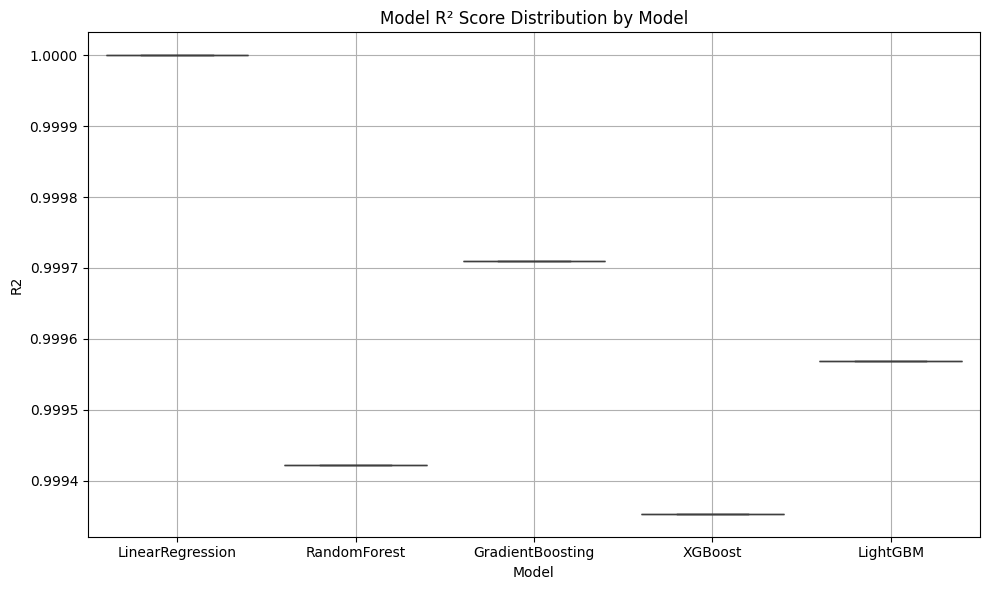

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Model', y='R2')
plt.title("Model R² Score Distribution by Model")
plt.grid(True)
plt.tight_layout()
plt.show()

Find which model wins most per symbol — likely Random Forest or XGBoost if data is nonlinear.

In [71]:
winner_counts = best_per_symbol['Model'].value_counts()
print(winner_counts)

Model
XGBoost    1
Name: count, dtype: int64


Useful for dashboards, presentations, or Tableau/PowerBI.

In [72]:
results_df.to_csv("symbol_model_comparison.csv", index=False)
best_per_symbol.to_csv("best_model_per_symbol.csv", index=False)

This can show whether symbols with fewer samples perform worse (common in real datasets).

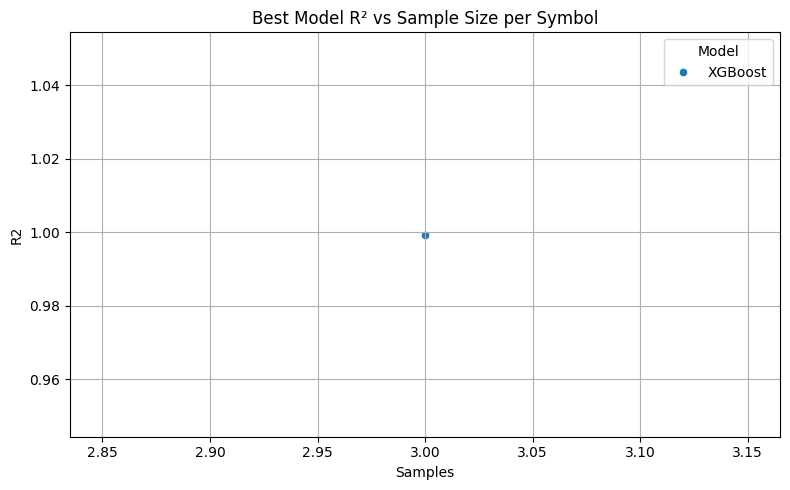

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(data=best_per_symbol, x="Samples", y="R2", hue="Model")
plt.title("Best Model R² vs Sample Size per Symbol")
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
# Save sample of your cleaned data with features
df[["Symbol"] + [target] + features].to_csv("cleaned_stock_features.csv", index=False)

In [80]:
import re
import joblib
import os

os.makedirs("models", exist_ok=True)

for symbol in tqdm(symbols):
    symbol_df = df[df['Symbol'] == symbol]
    
    if len(symbol_df) < 200:
        continue

    X = symbol_df[features]
    y = symbol_df['Close']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = xgb.XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    model.fit(X_train, y_train)

    # Sanitize the symbol name for filename safety
    safe_symbol = re.sub(r'[^\w\-]', '_', symbol)

    # Save the model safely
    joblib.dump(model, f"models/{safe_symbol}.pkl")


100%|██████████| 545/545 [07:23<00:00,  1.23it/s]


In [81]:
dt = pd.read_csv("cleaned_stock_features.csv")
dt.columns = dt.columns.str.strip()

In [82]:
dt.columns

Index(['Symbol', 'Close', 'Open', 'High', 'Low', 'VWAP', 'Prev. Close',
       'Trans.', 'Diff', 'Range', 'Diff %', 'Range %', 'VWAP %', '120 Days',
       '180 Days', '52 Weeks High', '52 Weeks Low', 'log_vol', 'log_turnover',
       'Year', 'Month', 'Weekday'],
      dtype='object')